In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('/users/cherry/Desktop/Titanic/train.csv')
test_data = pd.read_csv('/users/cherry/Desktop/Titanic/test.csv')


print(train_data.shape)
train_data.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


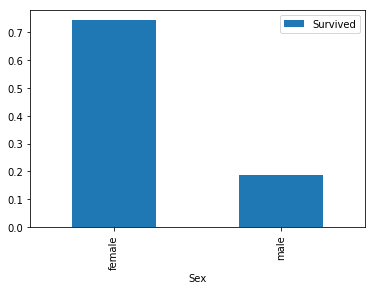

In [2]:
# explore data - sex
train_data.groupby(['Sex','Survived'])['Survived'].count()

import matplotlib.pyplot as plt
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

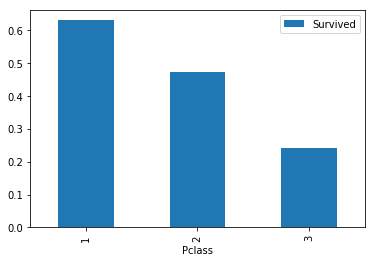

In [3]:
# explore data - pclass 
train_data.groupby(['Pclass','Survived'])['Survived'].count()

import matplotlib.pyplot as plt
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

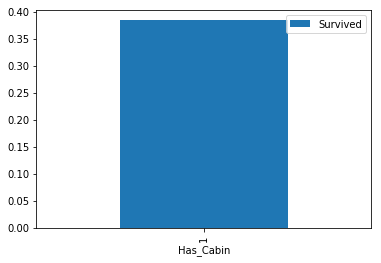

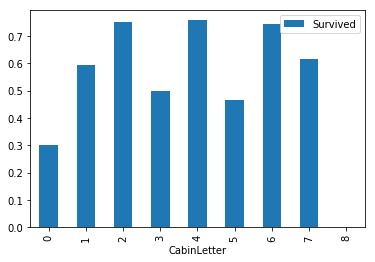

In [4]:
 # explore data - cabin 
train_data.loc[train_data.Cabin.isnull(), 'Cabin'] = 'na'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

# create feature for the alphabetical part of t he cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x:x[0])

# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()

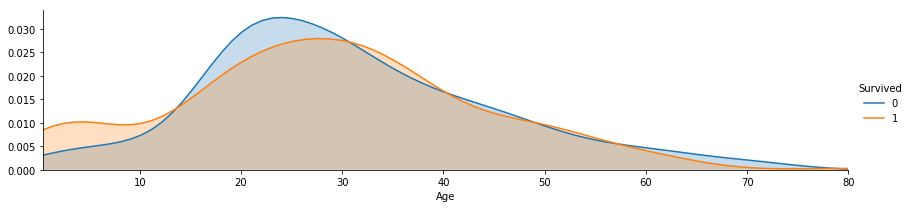

In [5]:
# explore data - age
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(train_data['Age'].min(), train_data['Age'].max()))
facet.add_legend()

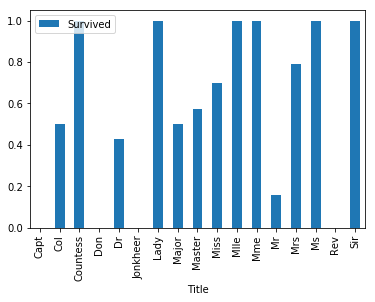

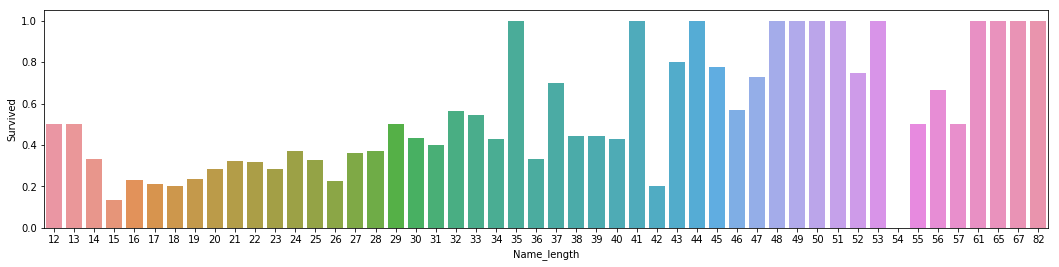

In [6]:
# explore data - name
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

# name length
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)

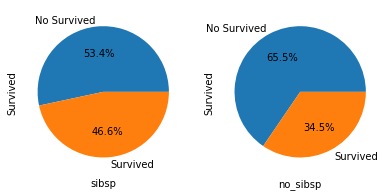

In [7]:
# explore data - SibSp
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(132)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(133)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

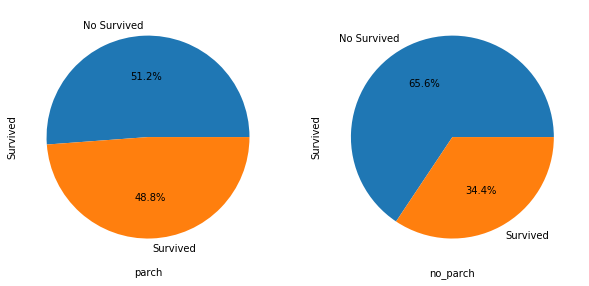

In [8]:
# explore data - parch
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

Text(0.5, 1.0, 'Family and Survived')

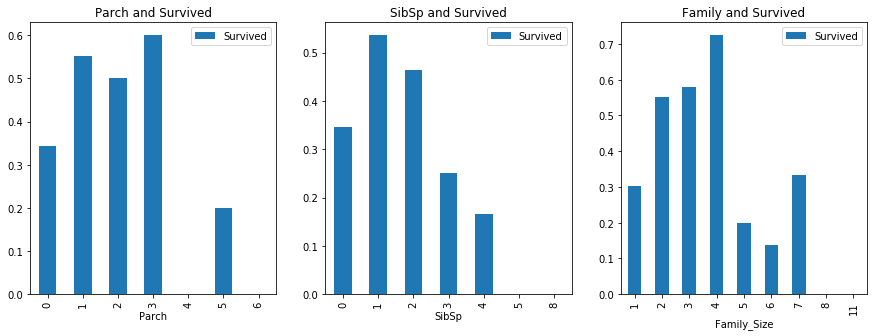

In [9]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar(ax=ax[2])
ax[2].set_title('Family and Survived')

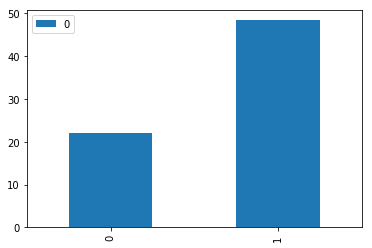

In [10]:
# explore data - fare
fare_notsurvived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_notsurvived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_notsurvived.std(), fare_survived.std()])
average_fare.plot.bar()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


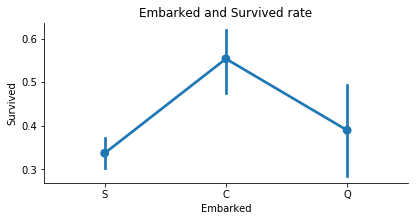

In [11]:
# explore data - embarked
sns.factorplot('Embarked', 'Survived', data=train_data, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

In [12]:
# feature engineering
# combine data
test_data['Survived'] = 0
train_test = train_data.append(test_data)

# embarked
train_test['Embarked'].fillna(train_test['Embarked'].mode().iloc[0], inplace=True)
emb_dummies_df = pd.get_dummies(train_test['Embarked'], prefix=train_test[['Embarked']].columns[0])
train_test = pd.concat([train_test, emb_dummies_df], axis=1)


train_test.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,CabinLetter,Embarked,Family_Size,Fare,Has_Cabin,Name,Name_length,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Embarked_C,Embarked_Q,Embarked_S
0,22.0,na,0.0,S,2.0,7.2500,1.0,"Braund, Mr. Owen Harris",23.0,0,1,3,male,1,0,A/5 21171,Mr,0,0,1
1,38.0,C85,1.0,C,2.0,71.2833,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51.0,0,2,1,female,1,1,PC 17599,Mrs,1,0,0
2,26.0,na,0.0,S,1.0,7.9250,1.0,"Heikkinen, Miss. Laina",22.0,0,3,3,female,0,1,STON/O2. 3101282,Miss,0,0,1
3,35.0,C123,1.0,S,2.0,53.1000,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44.0,0,4,1,female,1,1,113803,Mrs,0,0,1
4,35.0,na,0.0,S,1.0,8.0500,1.0,"Allen, Mr. William Henry",24.0,0,5,3,male,0,0,373450,Mr,0,0,1


In [13]:
# sex
train_test = pd.get_dummies(train_test,columns=["Sex"])

# title
import re
train_test['Title'] = train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
train_test = pd.get_dummies(train_test,columns=['Title'])

# name length
train_test['Name_length'] = train_test['Name'].apply(len)


train_test.head()

,Age,Cabin,CabinLetter,Embarked,Family_Size,Fare,Has_Cabin,Name,Name_length,Parch,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,na,0.0,S,2.0,7.2500,1.0,"Braund, Mr. Owen Harris",23,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,C85,1.0,C,2.0,71.2833,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,na,0.0,S,1.0,7.9250,1.0,"Heikkinen, Miss. Laina",22,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,C123,1.0,S,2.0,53.1000,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,na,0.0,S,1.0,8.0500,1.0,"Allen, Mr. William Henry",24,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
# fare
train_test['Fare'] = train_test[['Fare']].fillna(train_test.groupby('Pclass').transform(np.mean))

train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 38 columns):
Age                   1046 non-null float64
Cabin                 982 non-null object
CabinLetter           891 non-null float64
Embarked              1309 non-null object
Family_Size           891 non-null float64
Fare                  1309 non-null float64
Has_Cabin             891 non-null float64
Name                  1309 non-null object
Name_length           1309 non-null int64
Parch                 1309 non-null int64
PassengerId           1309 non-null int64
Pclass                1309 non-null int64
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Title_Capt            1309 non-null uint8
Ti

In [16]:
# pclass
train_test = pd.get_dummies(train_test,columns=['Pclass'])

train_test.head()

,Age,Cabin,CabinLetter,Embarked,Family_Size,Fare,Has_Cabin,Name,Name_length,Parch,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Pclass_1,Pclass_2,Pclass_3
0,22.0,na,0.0,S,2.0,7.2500,1.0,"Braund, Mr. Owen Harris",23,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,C85,1.0,C,2.0,71.2833,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,0,...,0,0,1,0,0,0,0,1,0,0
2,26.0,na,0.0,S,1.0,7.9250,1.0,"Heikkinen, Miss. Laina",22,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,1.0,S,2.0,53.1000,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,0,...,0,0,1,0,0,0,0,1,0,0
4,35.0,na,0.0,S,1.0,8.0500,1.0,"Allen, Mr. William Henry",24,0,...,0,1,0,0,0,0,0,0,0,1


In [18]:
# ticket
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]

train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 41 columns):
Age                   1046 non-null float64
Cabin                 982 non-null object
CabinLetter           891 non-null float64
Embarked              1309 non-null object
Family_Size           891 non-null float64
Fare                  1309 non-null float64
Has_Cabin             891 non-null float64
Name                  1309 non-null object
Name_length           1309 non-null int64
Parch                 1309 non-null int64
PassengerId           1309 non-null int64
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Title_Capt            1309 non-null uint8
Title_Col             1309 non-null uint8
Ti

In [20]:
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)


AttributeError: 'float' object has no attribute 'isnumeric'

In [21]:
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 89 columns):
Age                         1046 non-null float64
Cabin                       982 non-null object
CabinLetter                 891 non-null float64
Embarked                    1309 non-null object
Family_Size                 891 non-null float64
Fare                        1309 non-null float64
Has_Cabin                   891 non-null float64
Name                        1309 non-null object
Name_length                 1309 non-null int64
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Ticket                      1309 non-null object
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male            

In [24]:
train_test['Cabin'] = train_test['Cabin'].apply(lambda x:1 if pd.notnull(x) else 0)

train_test.head()

,Age,Cabin,CabinLetter,Embarked,Family_Size,Fare,Has_Cabin,Name,Name_length,Parch,...,Ticket_Letter_SOTON/O2,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P
0,22.0,1,0.0,S,2.0,7.2500,1.0,"Braund, Mr. Owen Harris",23,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,1,1.0,C,2.0,71.2833,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,1,0.0,S,1.0,7.9250,1.0,"Heikkinen, Miss. Laina",22,0,...,0,0,0,1,0,0,0,0,0,0
3,35.0,1,1.0,S,2.0,53.1000,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,1,0.0,S,1.0,8.0500,1.0,"Allen, Mr. William Henry",24,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 89 columns):
Age                         1046 non-null float64
Cabin                       1309 non-null int64
CabinLetter                 891 non-null float64
Embarked                    1309 non-null object
Family_Size                 891 non-null float64
Fare                        1309 non-null float64
Has_Cabin                   891 non-null float64
Name                        1309 non-null object
Name_length                 1309 non-null int64
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Ticket                      1309 non-null object
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male            

In [25]:
train_test.drop("Embarked",inplace = True,axis=1)
train_test.drop("CabinLetter",inplace = True,axis=1)
train_test.drop("Has_Cabin",inplace = True,axis=1)
train_test.drop("Name",inplace = True,axis=1)

In [26]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 85 columns):
Age                         1046 non-null float64
Cabin                       1309 non-null int64
Family_Size                 891 non-null float64
Fare                        1309 non-null float64
Name_length                 1309 non-null int64
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Ticket                      1309 non-null object
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male                    1309 non-null uint8
Title_Capt                  1309 non-null uint8
Title_Col                   1309 non-null uint8
Title_Don                   1309 non-null uint8
Title_Dona              

In [27]:
train_test['Family_Size'] = train_test['Parch'] + train_test['SibSp'] + 1
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 85 columns):
Age                         1046 non-null float64
Cabin                       1309 non-null int64
Family_Size                 1309 non-null int64
Fare                        1309 non-null float64
Name_length                 1309 non-null int64
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Ticket                      1309 non-null object
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male                    1309 non-null uint8
Title_Capt                  1309 non-null uint8
Title_Col                   1309 non-null uint8
Title_Don                   1309 non-null uint8
Title_Dona               

In [34]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 86 columns):
Age                         1046 non-null float64
Cabin                       1309 non-null int64
Family_Size                 1309 non-null int64
Fare                        1309 non-null float64
Name_length                 1309 non-null int64
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male                    1309 non-null uint8
Title_Capt                  1309 non-null uint8
Title_Col                   1309 non-null uint8
Title_Don                   1309 non-null uint8
Title_Dona                  1309 non-null uint8
Title_Dr                  

In [35]:
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

missing_age = train_test.drop(['Survived'],axis=1)
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(missing_age_X_train,missing_age_X_test)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [37]:
from sklearn import linear_model
lin = linear_model.BayesianRidge()
lin.fit(missing_age_X_train,missing_age_Y_train)
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

In [38]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 88 columns):
Age                         1309 non-null float64
Cabin                       1309 non-null int64
Family_Size                 1309 non-null int64
Fare                        1309 non-null float64
Name_length                 1309 non-null int64
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male                    1309 non-null uint8
Title_Capt                  1309 non-null uint8
Title_Col                   1309 non-null uint8
Title_Don                   1309 non-null uint8
Title_Dona                  1309 non-null uint8
Title_Dr                  

In [40]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)


In [41]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=2,max_depth=6,oob_score=True)

rf.fit(train_data_X,train_data_Y)

print(rf.predict(test_data_X))


test_data["Survived"] = rf.predict(test_data_X)
RF = test_data[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF1.csv')



[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
